In [54]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt


base_dir = os.getcwd()
file = 'data/entire_field_raw_3_class/walking/train/entire_field_raw_walk1.pkl'
sample_file_path = os.path.join(base_dir,file)

bg_noise = 'data/bg_noise/bg_noise6.pkl'
bg_noise_path = os.path.join(base_dir, bg_noise)


In [55]:
with open(sample_file_path, 'rb') as sample_file_path:
    data = pickle.load(sample_file_path)

with open(bg_noise_path, 'rb') as bg_noise_path:
    bg_noise = pickle.load(bg_noise_path)

In [56]:
points = np.vstack(data)
bg_noise = np.vstack(bg_noise)

In [57]:
len(points)

619

In [58]:
len(bg_noise)

394

In [59]:
x_points = points[:,0]
y_points = points[:,1]
z_points = points[:,2]

bg_x = bg_noise[:,0]
bg_y = bg_noise[:,1]
bg_z = bg_noise[:,2]

Text(0.5, 0, 'Z')

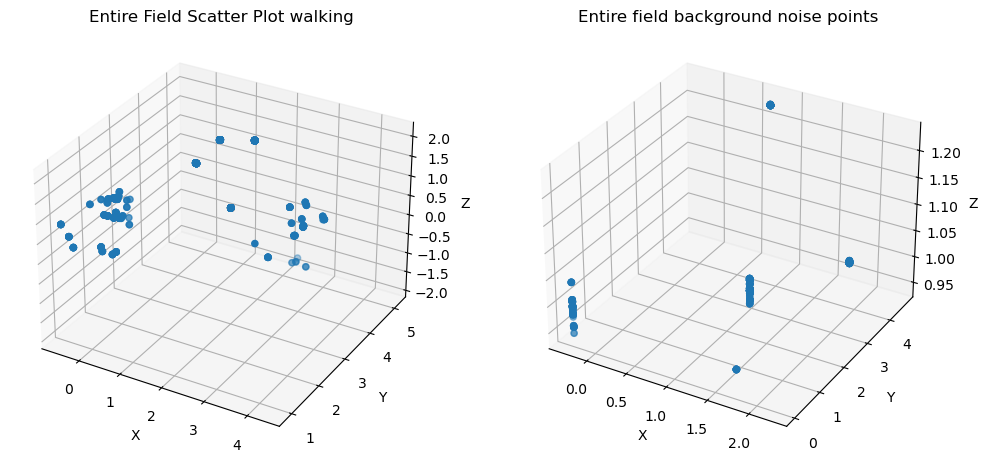

In [60]:
fig, (ax, ax1) = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(12,6))
ax.scatter(x_points,y_points,z_points)
ax.set_title('Entire Field Scatter Plot walking')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [61]:
def background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)
        

In [62]:
filtered_points,points_removed = background_subtraction(bg_noise, points, threshold=1)

points removed: 278


Text(0.5, 0, 'Z')

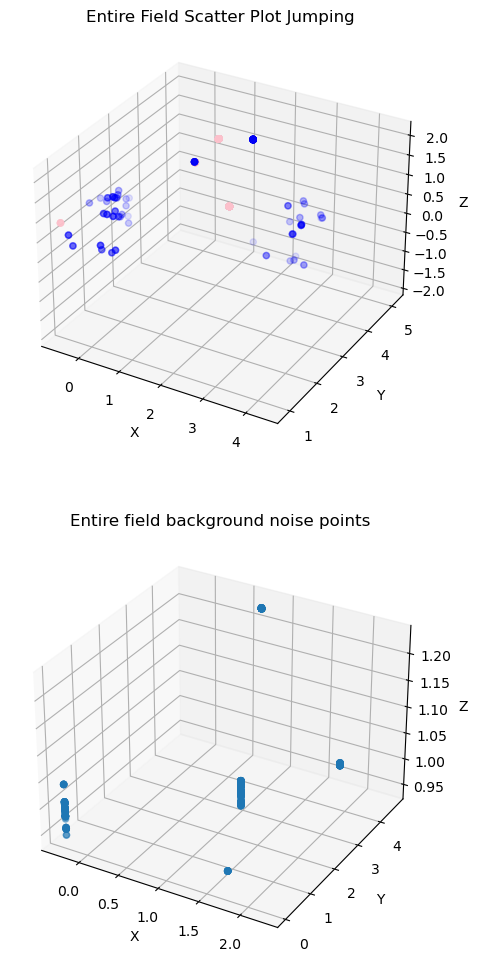

In [63]:
fig, (ax, ax1) = plt.subplots(2,1, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=0.3, label='Points Removed')
ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [64]:
np.mean(filtered_points[:4])

31.38

In [65]:
np.mean(points_removed[:4])

32.38

In [66]:
np.mean(bg_noise[:4])

32.56

In [67]:
from glob import glob
##create array
bg_noise_merge = []
#specify bg noise path
bg_noise_folder = 'data/bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        bg_noise_merge.append(data)
bg_noise_merge = np.vstack(bg_noise_merge)
#open file and merge to array
#store array in new file with entire merged bgnoise data


In [68]:
print(bg_noise_merge)

[[ 7.056e-01  4.680e+00  1.230e+00  0.000e+00  1.890e+02]
 [ 2.260e+00  2.766e+00  1.102e+00  0.000e+00  1.650e+02]
 [ 3.418e-01  2.266e-01  5.859e-01  0.000e+00  1.120e+02]
 ...
 [ 3.418e-01  2.305e-01  5.693e-01  0.000e+00  1.120e+02]
 [ 1.740e+00  3.125e-02  1.007e+00  0.000e+00  1.420e+02]
 [-2.979e-01  6.250e-02  1.015e+00  0.000e+00  1.420e+02]]


In [69]:
bg_noise_merge.shape

(85559, 5)

In [70]:
filtered_points,points_removed = background_subtraction(bg_noise_merge, points, threshold=0.1)

points removed: 135


(-2.0861328125, 2.2580078125)

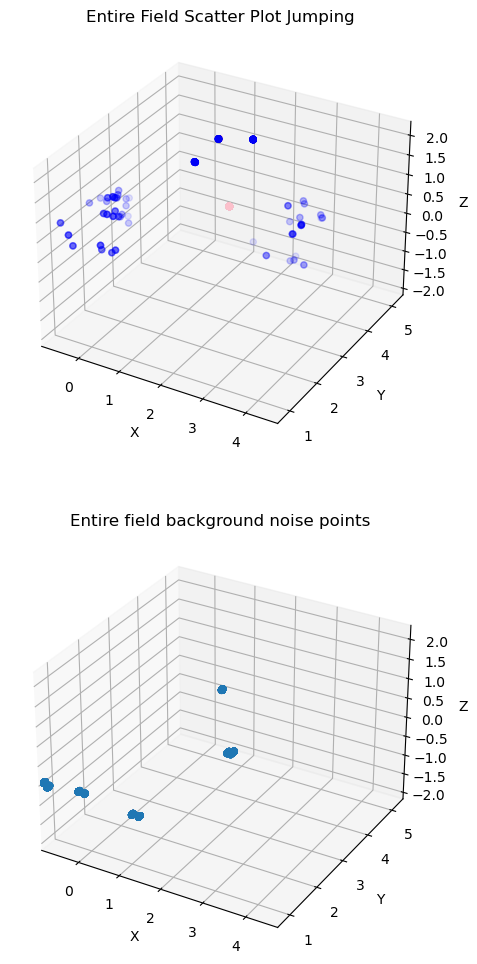

In [71]:
fig, (ax, ax1) = plt.subplots(2,1, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=0.3, label='Points Removed')
ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()


ax1.scatter(bg_noise_merge[:,0], bg_noise_merge[:,1], bg_noise_merge[:,3])
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)

In [72]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/lab_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(bg_noise_merge)

No handles with labels found to put in legend.


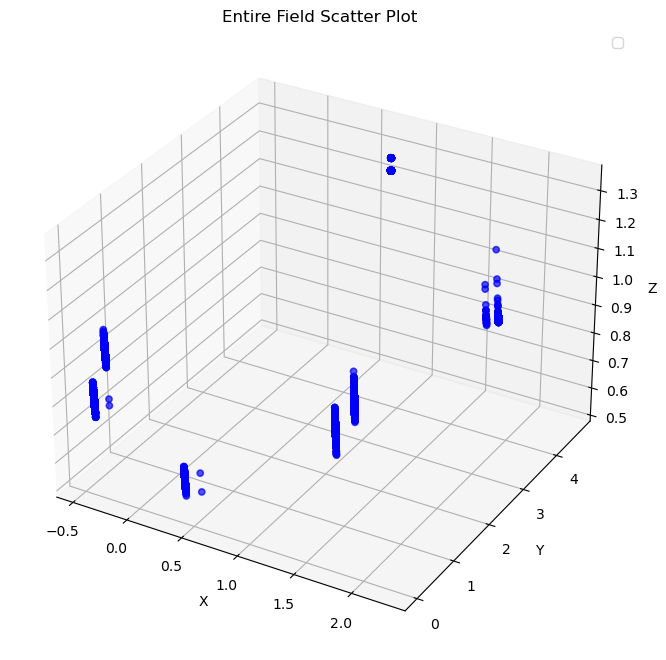

In [76]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set axis limits (optional, based on your previous code)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# Show legend
ax.legend()

plt.show()